# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Prerequisites

Before starting this project, you should have some basic knowledge of Python programming and Pandas. In addition, you may want to use the following packages in your Python environment:

- pandas
- numpy
- seaborn
- matplotlib

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Task 1: Load the Data

In [1]:
# your code here
# importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# importing dataset
file_path = "Online Retail.xlsx"
df_raw = pd.read_excel(file_path)


In [3]:
df_raw.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
# Display basic info
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


The dataset exhibits a significant number of missing values in the 'Description' column (1454) and a substantially larger number in the 'CustomerID' column (135,080). The absence of a 'CustomerID' raises concerns regarding the reliability and usability of these records for customer-centric analysis. Without a unique identifier, it's impossible to track purchase history, segment customers, or perform accurate customer lifetime value calculations for these entries. These records might represent guest purchases, data entry errors, or other scenarios requiring further investigation to determine appropriate handling strategies (e.g., imputation, removal, or separate analysis).

In [5]:
# Check for Missing Values
df_raw.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Building upon the initial observation, the presence of missing values in both the 'Description' and 'CustomerID' columns is now confirmed.

# Task 2: Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.

In [6]:
# Check for Missing Values
df_raw.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Building upon the initial observation, the presence of missing values in both the 'Description' and 'CustomerID' columns is now confirmed.

In [7]:
# df_raw size before droping missing values and duplicates
df_raw.shape

(541909, 8)

In [8]:
# Checklist: Handle Missing Values, Check for duplicates
# Before Droping
duplicate_rows_df = df_raw[df_raw.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (5268, 8)


In [9]:
# Drop duplicates
df_duplicates = df_raw.drop_duplicates()

In [10]:
# Check the shape of the DataFrame after dropping duplicates
df_duplicates.shape

(536641, 8)

In [11]:
# Verify the number of dropped rows
print("Number of rows dropped:", df_raw.shape[0] - df_duplicates.shape[0])

Number of rows dropped: 5268


In [12]:
# Verify that there are no remaining duplicates in the new DataFrame
print("Number of duplicate rows in the new DataFrame:", df_duplicates.duplicated().sum())

Number of duplicate rows in the new DataFrame: 0


In [13]:
# Display the first few rows of the DataFrame with duplicates removed
df_duplicates.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [14]:
# checking for missing values again
df_duplicates.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [15]:
# Drop missing values
df_clean = df_duplicates.dropna()

In [16]:
# Double check if the values are totally drop
df_clean.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [17]:
df_clean.count()

InvoiceNo      401604
StockCode      401604
Description    401604
Quantity       401604
InvoiceDate    401604
UnitPrice      401604
CustomerID     401604
Country        401604
dtype: int64

# Task 3: Explore the basic statistics of the dataset, including measures of central tendency and dispersion.

In [18]:
# Basic Statistics
df_clean.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


Following the removal of duplicate entries and rows with missing values, the resulting df_clean dataset contains 401,604 observations, as indicated by its .describe() output. Examining the 'Quantity' column reveals a substantial disparity between the mean (12.18) and the extreme minimum (-80995) and maximum (80995) values. This significant range strongly suggests the presence of outliers. Similarly, the 'UnitPrice' column exhibits a large difference between its mean (3.47) and the maximum value (38970), which is also likely an outlier.

These extreme values in 'Quantity' and 'UnitPrice' could represent bulk purchases, potentially from one-time or regular bulk-buying customers. Further analysis, particularly through visualization techniques, will be crucial to understand the nature and impact of these potential outliers and to determine appropriate handling strategies.

In [19]:
# Filtering for Negative Quantities and count the number of return which are the negative values in the dataset
negative_quantity = df_clean[df_clean['Quantity'] < 0]

In [20]:
print(negative_quantity.head()) # Display the first few rows
print(f"\nNumber of transactions with negative quantity: {len(negative_quantity)}")

    InvoiceNo StockCode                       Description  Quantity  \
141   C536379         D                          Discount        -1   
154   C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235   C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236   C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237   C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   

            InvoiceDate  UnitPrice  CustomerID         Country  
141 2010-12-01 09:41:00      27.50     14527.0  United Kingdom  
154 2010-12-01 09:49:00       4.65     15311.0  United Kingdom  
235 2010-12-01 10:24:00       1.65     17548.0  United Kingdom  
236 2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
237 2010-12-01 10:24:00       0.29     17548.0  United Kingdom  

Number of transactions with negative quantity: 8872


In [21]:
# Filtering for Zero Unit Price and check how many transaction with zero units price
zero_unit_price = df_clean[df_clean['UnitPrice'] == 0]
print(zero_unit_price.head()) # Display the first few rows
print(f"\nNumber of transactions with zero unit price: {len(zero_unit_price)}")

      InvoiceNo StockCode                   Description  Quantity  \
9302     537197     22841  ROUND CAKE TIN VINTAGE GREEN         1   
33576    539263     22580  ADVENT CALENDAR GINGHAM SACK         4   
40089    539722     22423      REGENCY CAKESTAND 3 TIER        10   
47068    540372     22090       PAPER BUNTING RETROSPOT        24   
47070    540372     22553        PLASTERS IN TIN SKULLS        24   

              InvoiceDate  UnitPrice  CustomerID         Country  
9302  2010-12-05 14:02:00        0.0     12647.0         Germany  
33576 2010-12-16 14:36:00        0.0     16560.0  United Kingdom  
40089 2010-12-21 13:45:00        0.0     14911.0            EIRE  
47068 2011-01-06 16:41:00        0.0     13081.0  United Kingdom  
47070 2011-01-06 16:41:00        0.0     13081.0  United Kingdom  

Number of transactions with zero unit price: 40


# Task 4: Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.

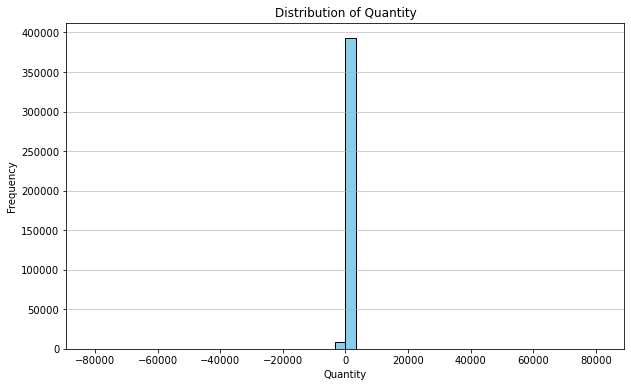

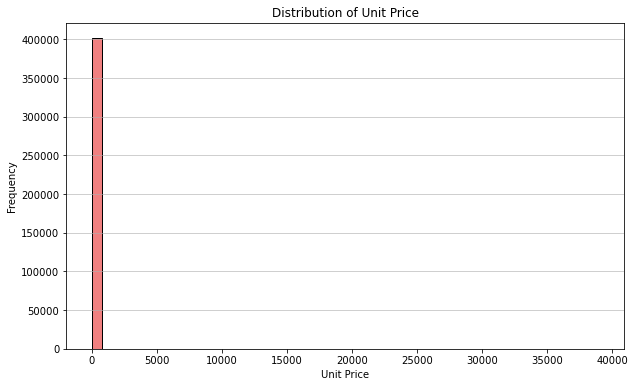

In [22]:
# Visualizing Quantity and UnitPrice
# Histogram for Quantity
plt.figure(figsize=(10, 6))  # Adjust figure size for better readability
plt.hist(df_clean['Quantity'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Histogram for UnitPrice
plt.figure(figsize=(10, 6))  # Adjust figure size
plt.hist(df_clean['UnitPrice'], bins=50, color='lightcoral', edgecolor='black')
plt.title('Distribution of Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

As anticipated from the df_clean.describe() results, the 'Distribution of Quantity' plot clearly shows extreme values extending to both positive and negative 80,000, confirming the presence of outliers. Similarly, the 'Distribution of Unit Price' plot reveals outliers stretching up to 40,000.

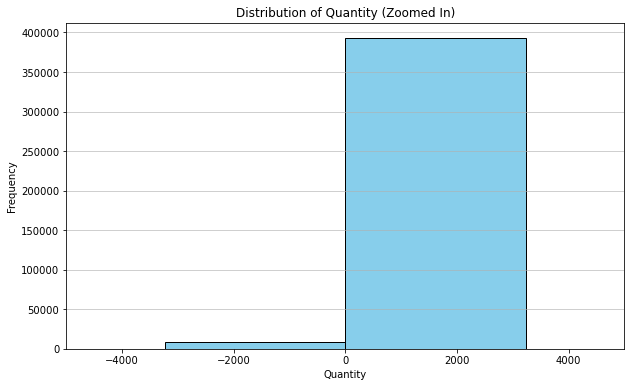

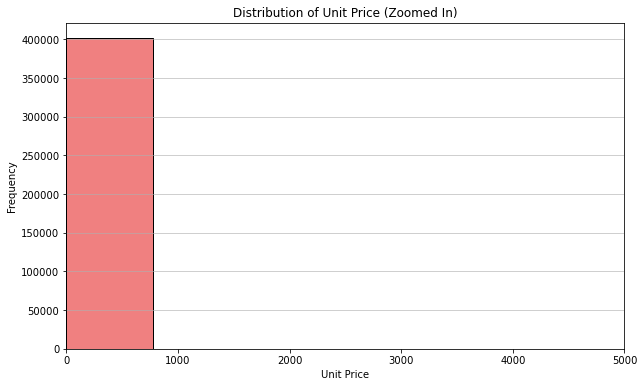

In [23]:
#Zoom in Histogram to double check if my plot is just misleading or it will confirm my theory that an extreme outlier is causing this stretch
# Histogram for Quantity (Zoomed In)
plt.figure(figsize=(10, 6))
plt.hist(df_clean['Quantity'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Quantity (Zoomed In)')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.xlim(-5000, 5000)  # Set the x-axis limits
plt.grid(axis='y', alpha=0.75)
plt.show()

# Histogram for UnitPrice (Zoomed In)
plt.figure(figsize=(10, 6))
plt.hist(df_clean['UnitPrice'], bins=50, color='lightcoral', edgecolor='black')
plt.title('Distribution of Unit Price (Zoomed In)')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.xlim(0, 5000)  # Set the x-axis limits
plt.grid(axis='y', alpha=0.75)
plt.show()

Upon closer inspection (zooming in), the outlier in the 'Distribution of Unit Price' appears to be near 40,000. A similar close examination of the 'Distribution of Quantity' also reveals potential outliers.

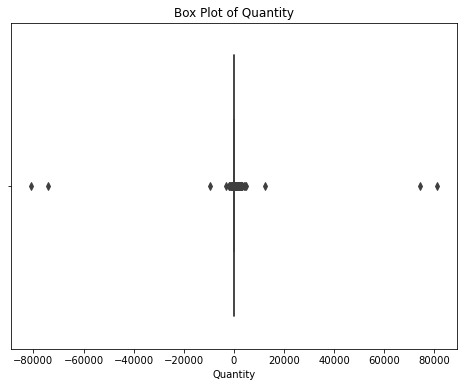

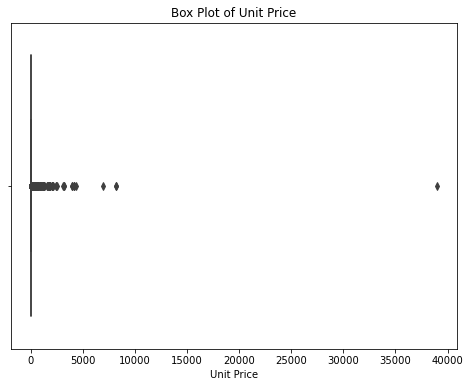

In [24]:
# Visualizing outliers
# Box plot for Quantity
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_clean['Quantity'])
plt.title('Box Plot of Quantity')
plt.xlabel('Quantity')
plt.show()

# Box plot for UnitPrice
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_clean['UnitPrice'])
plt.title('Box Plot of Unit Price')
plt.xlabel('Unit Price')
plt.show()

The observed stretch in the distributions is confirmed to be caused by the presence of outliers. For the purpose of my revenue by quantity analysis, I will retain these outlier data points.

# Task 5: Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.

In [25]:
# I added .loc[:] to address a minor warning in pandas.
df_clean.loc[:,'TotalPrice'] = df_clean['Quantity'] * df_clean['UnitPrice']

In [26]:
# Display the first few rows with the new column
print(df_clean[['InvoiceNo', 'Quantity', 'UnitPrice', 'TotalPrice']].head())

  InvoiceNo  Quantity  UnitPrice  TotalPrice
0    536365         6       2.55       15.30
1    536365         6       3.39       20.34
2    536365         8       2.75       22.00
3    536365         6       3.39       20.34
4    536365         6       3.39       20.34


In [27]:
# Ensure InvoiceDate is in datetime format
df_clean.loc[:, 'InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])

In [28]:
# Extract the Month
df_clean.loc[:, 'Month'] = df_clean['InvoiceDate'].dt.month

In [29]:
# Aggregate Sales by Month
monthly_sales = df_clean.groupby('Month')['TotalPrice'].sum()

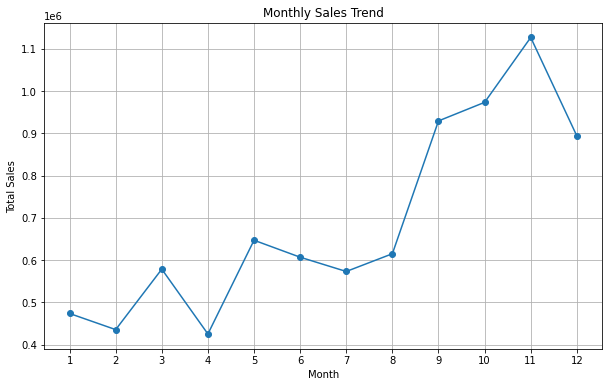

In [30]:
# Visualize the Trend (Line Plot)
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(1, 13)) # Ensure all months are displayed
plt.grid(True)
plt.show()

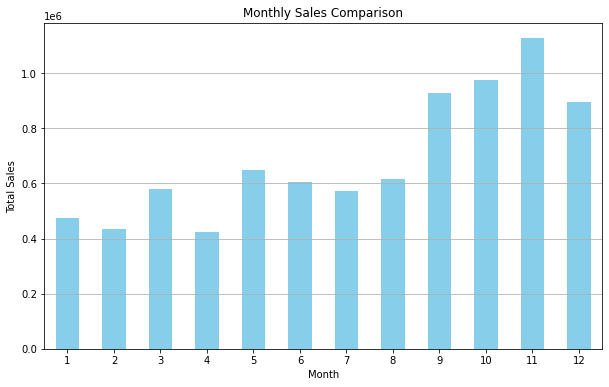

In [31]:
# Visualize the Monthly Sales Comparison
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Monthly Sales Comparison')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=0) # Keep month numbers horizontal
plt.grid(axis='y')
plt.show()

- Sales Spike in Q3/Q4: Both the line plot and the bar plot clearly show a significant surge in sales starting around September (Month 9) and peaking in November (Month 11). This strongly supports your hypothesis about the impact of the holiday shopping season in the UK and Europe.

- Decline in February: The line plot shows a noticeable dip in sales in February (Month 2), which, as we discussed, is a common post-holiday trend.

- Dip in April: The line plot also indicates a dip in sales in April (Month 4), which could be related to Easter holidays or other seasonal factors.

- Overall Trend: The line plot provides a good visual of the overall sales trend throughout the year, highlighting the strong seasonality. The bar plot effectively compares the total sales for each month.

## Identify the busiest days of the week in terms of sales.

In [32]:
# Extract the Day of the Week
df_clean.loc[:, 'DayOfWeek'] = df_clean['InvoiceDate'].dt.day_name()

In [33]:
# Aggregate Sales by Day of the Week
daily_sales = df_clean.groupby('DayOfWeek')['TotalPrice'].sum()

In [34]:
# Order the Days of the Week (Crucial for correct plotting)
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_sales = daily_sales.reindex(days_order)

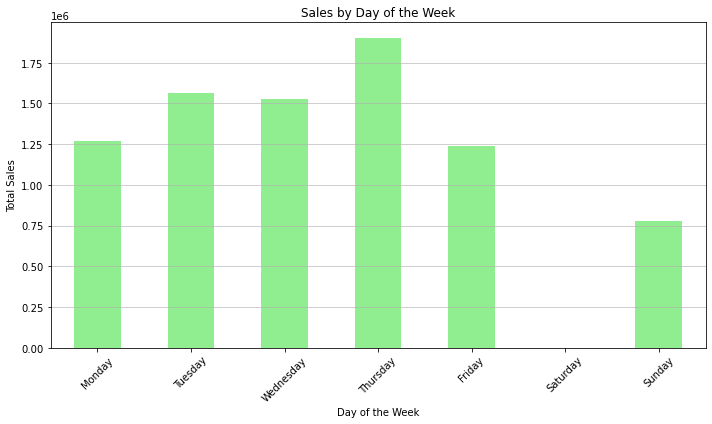

In [35]:
# Visualize the Trend (Bar Plot)
plt.figure(figsize=(10, 6))
daily_sales.plot(kind='bar', color='lightgreen')
plt.title('Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.grid(axis='y', alpha=0.75)
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

Mid-Week Peak: The trend of having the highest sales in the middle of the week (Tuesday, Wednesday, Thursday) is quite common for online retailers. This could be because people tend to browse and make purchases during their workdays or when they have more free time during the week compared to the weekend.

Lower Weekend Sales (Especially Saturday): The significant drop in sales on Friday and Sunday, and the complete absence on Saturday, is unusual for an online store that typically operates 24/7. Here are some potential reasons and things to consider:

   - Data Limitation: It's possible that the dataset doesn't fully capture all transactions, or there might be a specific reason why Saturday data is missing. We should perhaps check the range of dates in our InvoiceDate column to see if Saturdays are even present in the dataset.
    
   - Business Practice: It's highly unlikely for a modern online retailer to have zero sales on a Saturday. However, there might have been a specific operational reason during the 2010-2011 period for this particular business (e.g., scheduled maintenance, a very specific business model). This is less probable but worth considering.
    
   - Data Error: There could be an error in how the data was recorded or processed that resulted in no Saturday sales being included.

In [36]:
# Double Check what happen to Saturday Data
saturday_transactions = df_clean[df_clean['DayOfWeek'] == 'Saturday']
print(saturday_transactions.head())
print(f"\nNumber of Saturday transactions: {len(saturday_transactions)}")

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice, Month, DayOfWeek]
Index: []

Number of Saturday transactions: 0


It is doubtful that an online retail store, typically expected to operate 24/7, would show no transactions on Saturdays, as indicated in the data.

# Task 6: Explore the top-selling products and countries based on the quantity sold.

## Top-Selling Products:

In [37]:
# Filter out transactions with negative quantity (returns) for this analysis
df_positive_quantity = df_clean[df_clean['Quantity'] > 0]

In [38]:
# Group by product description and sum the quantity
top_selling_products = df_positive_quantity.groupby('Description')['Quantity'].sum().sort_values(ascending=False)

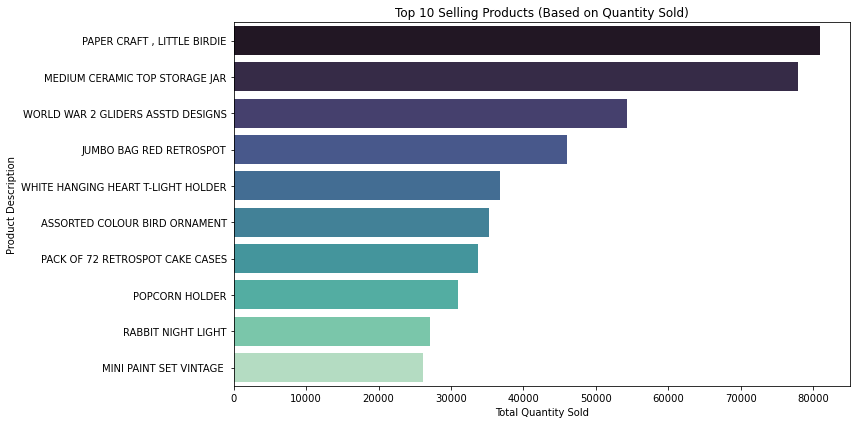


Top 10 Selling Products (Based on Quantity Sold):
 Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54319
JUMBO BAG RED RETROSPOT               46078
WHITE HANGING HEART T-LIGHT HOLDER    36706
ASSORTED COLOUR BIRD ORNAMENT         35263
PACK OF 72 RETROSPOT CAKE CASES       33670
POPCORN HOLDER                        30919
RABBIT NIGHT LIGHT                    27153
MINI PAINT SET VINTAGE                26076
Name: Quantity, dtype: int64


In [42]:
# Get the top 10 selling products
top_10_products = top_selling_products.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_products.values, y=top_10_products.index, palette='mako')
plt.title('Top 10 Selling Products (Based on Quantity Sold)')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Description')
plt.tight_layout()
plt.show()


print("\nTop 10 Selling Products (Based on Quantity Sold):\n", top_10_products)


##  Top-Selling Countries:

In [43]:
# Group by country and sum the quantity
top_selling_countries = df_positive_quantity.groupby('Country')['Quantity'].sum().sort_values(ascending=False)

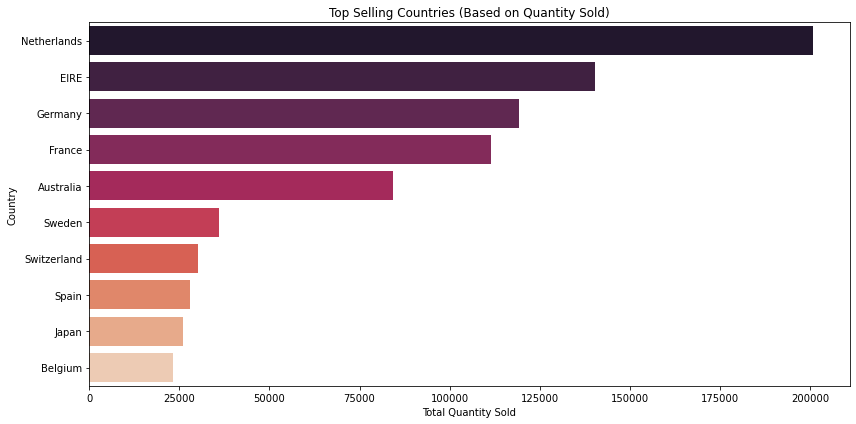


Top Selling Countries (Based on Quantity Sold):
 Country
Netherlands    200937
EIRE           140383
Germany        119156
France         111429
Australia       84199
Sweden          36078
Switzerland     30083
Spain           27944
Japan           26016
Belgium         23237
Name: Quantity, dtype: int64


In [44]:
# Get the top 10 countries (excluding the UK as it's the home country and likely dominates)
top_10_countries = top_selling_countries.head(11) # Get 11 and exclude the first if it's UK
if 'United Kingdom' in top_10_countries.index:
    top_10_countries = top_10_countries[1:] # Exclude UK

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_countries.values, y=top_10_countries.index, palette='rocket')
plt.title('Top Selling Countries (Based on Quantity Sold)')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

print("\nTop Selling Countries (Based on Quantity Sold):\n", top_10_countries)

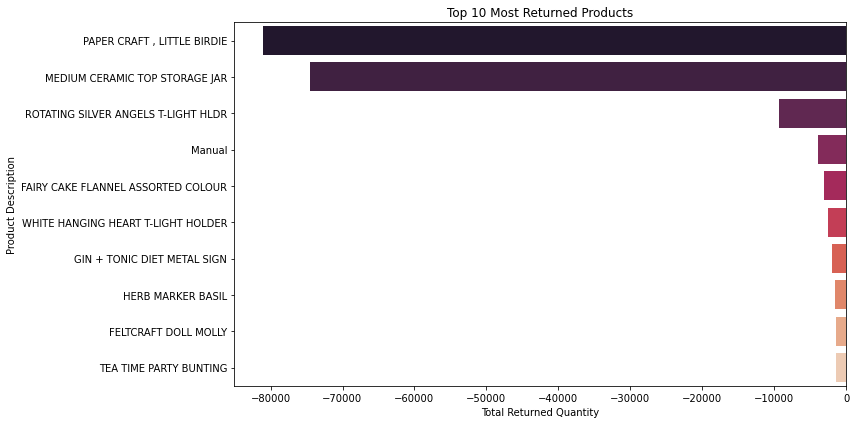


Top 10 Most Returned Products:
 Description
PAPER CRAFT , LITTLE BIRDIE           -80995
MEDIUM CERAMIC TOP STORAGE JAR        -74494
ROTATING SILVER ANGELS T-LIGHT HLDR    -9367
Manual                                 -3995
FAIRY CAKE FLANNEL ASSORTED COLOUR     -3150
WHITE HANGING HEART T-LIGHT HOLDER     -2578
GIN + TONIC DIET METAL SIGN            -2030
HERB MARKER BASIL                      -1527
FELTCRAFT DOLL MOLLY                   -1447
TEA TIME PARTY BUNTING                 -1424
Name: Quantity, dtype: int64


In [45]:
# check the top most return items
returned_products = df_clean[df_clean['Quantity'] < 0]
top_returns = returned_products.groupby('Description')['Quantity'].sum().sort_values().head(10)  # most negative first

plt.figure(figsize=(12, 6))
sns.barplot(x=top_returns.values, y=top_returns.index, palette='rocket')
plt.title('Top 10 Most Returned Products')
plt.xlabel('Total Returned Quantity')
plt.ylabel('Product Description')
plt.tight_layout()
plt.show()

print("\nTop 10 Most Returned Products:\n", top_returns)

**1. Top 10 Selling Products (Based on Quantity Sold)**

- This chart tells us which individual products were bought the most often. Think of it like a popularity contest for our products based on how many units were sold.

**What the data is telling us:**

- The product with the longest bar is the most popular in terms of the number of units customers bought.

- We can easily see which products are selling significantly more than others. For example, if the top bar is much longer than the rest, that product is a real star performer in terms of volume.

- The products at the bottom of the list, while still in the top 10, sell in lower quantities compared to the top ones.


**2. Top Selling Countries (Based on Quantity Sold)**

- This chart highlights which countries our products are being bought from the most, again based on the total number of items sold in each country.

**What the data is telling us:**

- The country with the longest bar is our biggest market in terms of the sheer volume of products purchased.

- We can see which countries are strong markets for us and which ones might have more potential for growth.

- If one or two countries have significantly longer bars than the others, it means they are major contributors to our overall sales volume.

**3. Top 10 Most Returned Products**

- This chart is a bit different. It tells us which products were returned by customers the most often. Think of it as a list of products that customers were least satisfied with for some reason.

**What the data is telling us:**

- The product with the longest bar (going furthest to the left) is the one that was returned the most frequently. This could indicate potential issues with the product itself (quality, description), or customer expectations.

- We can see which products have a higher return rate compared to others.

High return rates can be costly and indicate problems. This information helps us:

- Identify product issues: Investigate why certain products are being returned so often (e.g., poor quality, inaccurate description on the website, damage during shipping).

- Improve customer satisfaction: Addressing the reasons for returns can lead to happier customers.

- Reduce costs: Lowering return rates saves money on refunds, shipping, and handling.

# Task 7: Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.

## Potential Impact of Outliers and Anomalies on the Analysis:

1. Impact on Basic Statistics (e.g., Mean): The most immediate impact of extreme outliers, especially the very high positive quantities and unit prices, is on measures of central tendency like the mean. As we saw in the describe() output, the mean for Quantity and UnitPrice was pulled significantly higher than the median. This means the average value is not a true reflection of the typical transaction because a few extremely large values are skewing it. If someone only looked at the mean, they might get a misleading idea of the average order size or product price.

2. Impact on Data Visualization: Outliers can severely distort visualizations, making it difficult to understand the distribution of the majority of your data. As you experienced with the initial histograms of Quantity and UnitPrice, the extreme values stretched the x-axis so much that the bars representing the frequent values near zero became tiny and hard to distinguish. Box plots helped us see the outliers, but again, the extreme range can make the box itself appear very small relative to the outlier points.

3. Impact on Sales Calculations (Negative Quantities): The presence of negative quantities (returns) is crucial to consider when calculating total sales or revenue. If we simply summed the TotalPrice column without accounting for negative quantities, our total revenue figure would be inflated because returns represent money coming back to the customer, not sales revenue. For revenue analysis, it's usually necessary to either filter out returns or treat the TotalPrice for negative quantities as a reduction in revenue.

4. Impact on Sales Trend Analysis (Absence of Saturday Data): The complete lack of sales data for Saturdays significantly impacts our understanding of the weekly sales pattern. While we can confidently say which of the recorded days are busiest, we cannot make any conclusions or comparisons about Saturday sales. If Saturdays are actually active sales days for this business, then our weekly trend analysis is incomplete and potentially misleading. This is a major data limitation that needs to be acknowledged.

5. Impact on Identifying Top Products/Countries: While we filtered for positive quantities to find top selling items and countries, the outliers in quantity (both high and low) could still warrant further investigation. For instance, are the top products simply items that were part of those massive outlier transactions? Or are they consistently popular items across many smaller transactions?

6. Impact on Future Modeling: If you were to use this data for predictive modeling (e.g., forecasting sales, customer segmentation), outliers could have a disproportionate influence on the model training, leading to a model that doesn't perform well on typical data. Depending on the model, outliers might need to be removed, transformed, or handled specifically.

In summary, outliers and anomalies are not just interesting data points; they have a tangible impact on the accuracy and reliability of your analysis. Identifying and understanding them is a critical step before drawing firm conclusions or building models.

# Task 8: Draw conclusions and summarize your findings from the exploratory data analysis.

This analysis explores one year of transactional data from our online retail store, covering the period between December 2010 and December 2011. The dataset provides detailed information on customer purchases, including product specifics, quantities, prices, and transaction timestamps

**1. Dataset Overview:**
The analysis covers a full year of online retail transactions, providing a snapshot of customer purchasing behavior and sales performance across various products and regions during 2010-2011

**2. Typical Transactions:**
Based on the data, a typical transaction involves a relatively small quantity of items and a modest unit price. While the average quantity and price are influenced by extreme values (outliers), the median quantity of 5 and a median unit price of 1.95 GBP offer a more representative picture of most transactions. This suggests that while we have some large orders, the bulk of our business comes from smaller, more frequent purchases.   

**3. Sales Performance:**
The data reveals a strong seasonality in our sales. We observe a significant surge in sales activity starting around September and peaking in November. This aligns with the expected impact of the holiday shopping season. Conversely, there are noticeable dips in sales during February and April. Looking at the weekly trend, sales are highest in the middle of the week (Tuesday, Wednesday, and Thursday). Interestingly, there is a significant drop on Friday and Sunday, and a complete absence of sales data for Saturdays.   

**4. Geographic and Product Performance:**
Excluding the United Kingdom, our top-performing countries in terms of quantity sold are the Netherlands, EIRE, Germany, and France. This highlights key international markets where we have strong traction. In terms of products, the top sellers by quantity include 'PAPER CRAFT, LITTLE BIRDIE', 'MEDIUM CERAMIC TOP STORAGE JAR', and 'WORLD WAR 2 GLIDERS ASSTD DESIGNS'. Identifying these top performers can inform inventory management and marketing strategies. 

**5. Data Quality & Anomalies:**
The analysis surfaced several critical data quality issues and anomalies that warrant attention. We observed transactions with negative quantities, which typically represent returns. There were also instances of transactions with a zero unit price, which could indicate promotional items or data errors. Furthermore, extreme outliers were identified in both quantity and unit price. These outliers, while few, can significantly skew aggregated statistics like the mean. Most notably, the complete absence of sales data for Saturdays is unusual for an online retailer operating 24/7 and represents a significant data limitation that impacts our understanding of weekly sales patterns.   

**6. Overall Insights & Recommendations:**
The exploratory data analysis provides several key takeaways for the business:

- **Capitalize on Peak Seasons:** The strong performance in Q3 and Q4, particularly in November, underscores the importance of the holiday season. We should ensure our marketing and operations are optimized to maximize sales during this period.
    
- **Investigate Sales Dips:** The dips in February and April require further investigation. Understanding the reasons behind these lower sales periods could inform strategies to mitigate them in the future.
    
- **Address Data Limitations:** The missing Saturday data is a critical gap. We need to understand why this data is absent – whether it's a collection issue, a processing error, or a business-specific reason. Resolving this will provide a more complete picture of our weekly performance
    
- **Refine Data Cleaning:** The presence of negative quantities, zero prices, and extreme outliers highlights the need for robust data cleaning procedures for future analysis, especially when calculating metrics like total revenue.
    
- **Leverage Geographic and Product Insights:** Focusing on the top-performing countries and products can help tailor marketing efforts and optimize inventory, potentially leading to increased sales volume.   

In conclusion, this EDA has provided valuable insights into our sales trends, customer behavior, and areas for improvement. Addressing the identified data quality issues and further investigating the sales patterns will be crucial for making informed strategic decisions moving forward.


